In [1]:
d=15
fig_size = 10

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

In [3]:
def poly(d):            # returns the polynomial p
    if d%4==1: # given by 0 1 1 0 -1 -1 0 ... (starting at 0)
        def p(x):
            # define it periodically 
            if x%3 == 0:
                val = 0
            elif x%6 == 1 or x%6 == 2:
                val = 1
            else:
                val = -1

            # adjust the endpoints and return the appropriate value of p(x)
            if abs(x)<=(d+1)/2:
                return val
            elif x == (d+3)/2:
                return val+1
            elif x == -(d+3)/2:
                return val-1
            elif x == (d+5)/2:
                return val + (d+2)
            elif x == -(d+5)/2:
                return val - (d+2)
            else:  # can only calculate for x in the "nice" range
                print("Error, cannot calculate for d=",d,"and x=",x,"!")
                return None
    elif d%4==3: # given by 0 -1 -1 0 1 1 0 ... (starting at 0)
        def p(x):
            # define it periodically 
            if x%3 == 0:
                val = 0
            elif x%6 == 1 or x%6 == 2:
                val = -1
            else:
                val = 1
                
            # adjust the endpoints and return the appropriate value of p(x)
            if abs(x)<=(d+1)/2:
                return val
            elif x == (d+3)/2:
                return val+1
            elif x == -(d+3)/2:
                return val-1
            elif x == (d+5)/2:
                return val + (d+2)
            elif x == -(d+5)/2:
                return val - (d+2)
            else: # can only calculate for x in the "nice" range
                print("Error, cannot calculate for d=",d,"and x=",x,"!")
                return None
    elif d%4==2: # given by -1 -1 0 1 1 0 -1 ... (starting at -1/2)
        def p(x):
            x = x+1/2
            # define it periodically 
            if x%3 == 2:
                val = 0
            elif x%6 == 3 or x%6 == 4:
                val = 1
            else:
                val = -1
            x=x-1/2
            # adjust the endpoints and return the appropriate value of p(x)
            if abs(x)<int(d/2)+1:
                return val
            elif abs(x)<int(d/2)+2:
                return val+1
            elif abs(x)<int(d/2)+3:
                return val + (d+2)
            else:  # can only calculate for x in the "nice" range
                # print("Error, cannot calculate for d=",d,"and x=",x,"!")
                return None        # This is a flag telling us that we went outside of the nice box, and hence we should stop iterating
    elif d%4==0: # given by 1 1 0 -1 -1 0 1 ... (starting at -1/2)
        def p(x):
            x = x+1/2
            # define it periodically 
            if x%3 == 2:
                val = 0
            elif x%6 == 3 or x%6 == 4:
                val = -1
            else:
                val = 1
            x=x-1/2
            # adjust the endpoints and return the appropriate value of p(x)
            if abs(x)<int(d/2)+1:
                return val
            elif abs(x)<int(d/2)+2:
                return val+1
            elif abs(x)<int(d/2)+3:
                return val + (d+2)
            else:  # can only calculate for x in the "nice" range
                # print("Error, cannot calculate for d=",d,"and x=",x,"!")
                return None        # This is a flag telling us that we went outside of the nice box, and hence we should stop iterating
    else:
        print("Warning, this value of d has not yet been implemented!")
        def p(x):       # returns the identity, so that the program doesn't crash
            return x
        
    return p

In [4]:
def Henon(p,X):     # this is the Henon map of polynomial p: (x,y) -> (y, -x + p(y))
    result = p(X[1])
    if result == None:
        # print("Henon map failed at X=",X)
        return None # This is a (carried over) flag telling us that we went outside of the nice box, and hence we should stop iterating
    else:
        return [X[1],-X[0]+p(X[1])]

In [5]:
def trace_pt(p,X):          # follows the orbit of a point X under Henon map with polynomial p, 
                            # stopping either upon repeating a vertex or when we go outside the nice range
    orbit = []
    while X not in orbit:
        orbit.append(X)
        X = Henon(p,X)
        if X == None:
            return []               # if we iterate outside the d+2 box, we don't want to plot the orbit at all
    return orbit

In [6]:
def plot_orbit (orbit,col_index,box_range):         # plot the orbit
    # initialise the colours
    colours=["navy","mediumblue","slateblue","blueviolet","indigo","mediumorchid","thistle","plum","magenta","deeppink","crimson","lightpink","salmon","red","brown","maroon","saddlebrown","peru","sandybrown","lightsalmon","darkorange","goldenrod","gold","khaki","y","olive","olivedrab","yellowgreen","chartreuse", "limegreen", "g", "seagreen","mediumaquamarine","lightseagreen","teal","c","aqua","deepskyblue","lightskyblue","steelblue","gray"]
    colours = [colours[2*i%len(colours)] for i in range(0,len(colours))] # shuffle so that they're not too close
    col = colours[col_index % len(colours)]         # pick the corresponding colour

    if len(orbit) == 1:     # this must be a fixed point
        plt.plot(orbit[0][0],orbit[0][1],marker=r'$\circlearrowleft$',ms=300/box_range,color = col)
    elif len(orbit)>1:
        orbit.append(orbit[0])      # force a cycle
        xs = [orbit[i][0] for i in range(len(orbit)-1)]
        ys = [orbit[i][1] for i in range(len(orbit)-1)]
        plt.scatter(xs,ys,color = col)              # plots the individual vertices

        for k in range(len(orbit)-1):
            plt.arrow(orbit[k][0],orbit[k][1],orbit[k+1][0]-orbit[k][0],orbit[k+1][1]-orbit[k][1],width=.01,color = col,alpha =0.3)         # plots an arrow between two consecutive iterates

In [30]:
def left_shift_poly(d):
    def p(x):
        q = poly(d)
        return q(x+1/2)
    return p

def right_shift_poly(d):
    def p(x):
        q = poly(d)
        return q(x-1/2)
    return p

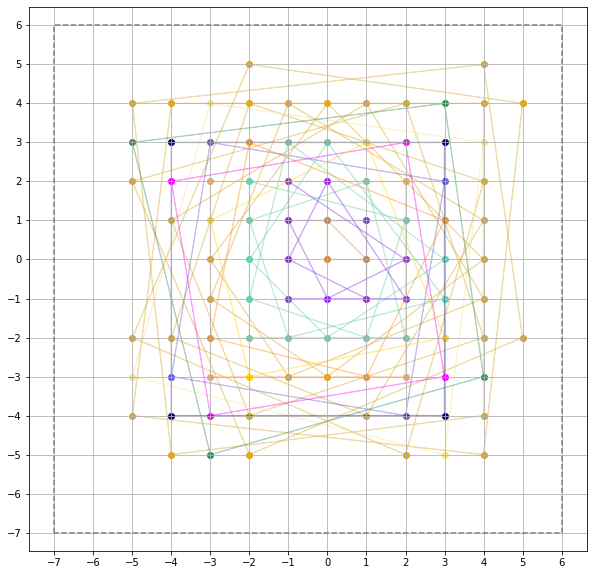

In [31]:
# LEFT SHIFT POLY:

p = left_shift_poly(d)     # get the polynomial
box_range = [-int(d/2)-3,int(d/2)+2]
check_range = [-int(d/2)-3,int(d/2)+2]     # could start cycles in a subset of the box 
plotted = []        # store all the vertices whose orbits we've already plotted

col_index = 0
plt.figure(figsize = (fig_size,fig_size))

xs = [box_range[0],box_range[0],box_range[1],box_range[1],box_range[0]]     
ys = [box_range[0],box_range[1],box_range[1],box_range[0],box_range[0]]
plt.plot(xs,ys,"--",color = "grey")     # draw a box through the box corresponding to the range, to show where the cycles are relative to it

for i in range(check_range[0],check_range[1]+1):    
    for j in range(check_range[0],check_range[1]+1):        # iterate through all the points
        if [i,j] not in plotted:            # only iterate if we haven't plotted already, to reduce computation
            orbit = trace_pt(p,[i,j])     # get the orbit by tracing the point
            for pt in orbit:
                plotted.append(pt)          # add each iterate to the list of plotted vertices
            plot_orbit(orbit,col_index,box_range)       # plot the orbit    
            col_index +=1                   # to vary our colours in a nice way

# plot formatting:

plt.grid(which="both")
plt.xticks([i for i in range(box_range[0]-1,box_range[1]+1)])
plt.yticks([i for i in range(box_range[0]-1,box_range[1]+1)])
plt.axis('equal')
plt.show()
plt.close()

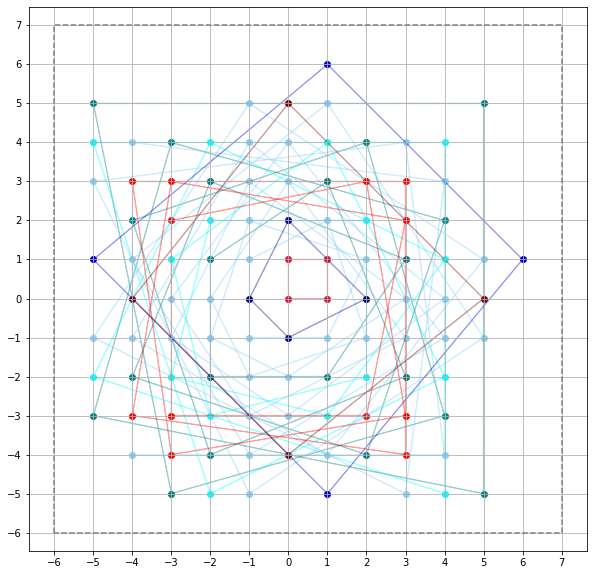

In [32]:
# RIGHT SHIFT POLY:

p = right_shift_poly(d)     # get the polynomial
box_range = [-int(d/2)-2,int(d/2)+3]
check_range = [-int(d/2)-2,int(d/2)+3]     # could start cycles in a subset of the box 
plotted = []        # store all the vertices whose orbits we've already plotted

col_index = 0
plt.figure(figsize = (fig_size,fig_size))

xs = [box_range[0],box_range[0],box_range[1],box_range[1],box_range[0]]     
ys = [box_range[0],box_range[1],box_range[1],box_range[0],box_range[0]]
plt.plot(xs,ys,"--",color = "grey")     # draw a box through the box corresponding to the range, to show where the cycles are relative to it

for i in range(check_range[0],check_range[1]+1):    
    for j in range(check_range[0],check_range[1]+1):        # iterate through all the points
        if [i,j] not in plotted:            # only iterate if we haven't plotted already, to reduce computation
            orbit = trace_pt(p,[i,j])     # get the orbit by tracing the point
            for pt in orbit:
                plotted.append(pt)          # add each iterate to the list of plotted vertices
            plot_orbit(orbit,col_index,box_range)       # plot the orbit    
            col_index +=1                   # to vary our colours in a nice way

# plot formatting:

plt.grid(which="both")
plt.xticks([i for i in range(box_range[0]-1,box_range[1]+1)])
plt.yticks([i for i in range(box_range[0]-1,box_range[1]+1)])
plt.axis('equal')
plt.show()
plt.close()

In [7]:
def trace_pt_any_orbit(p,X):
    orbit = []
    while X not in orbit:
        orbit.append(X)
        X = Henon(p,X)
        if X == None:
            print(orbit)
            print("The point",orbit[len(orbit)-1], "iterated out of the range")
            return orbit               # if we iterate outside the d+2 box, we don't want to plot the orbit at all
    return orbit

In [8]:
# ORBIT OF A SINGLE POINT UNDER RIGHT SHIFT POLY

p = right_shift_poly(d)     # get the polynomial

# Check the polynomial:
# print([p(x) for x in range(-d-1,d+3)])


box_range = [-int(d/2)-2,int(d/2)+3]
check_range = [-int(d/2)-2,int(d/2)+3]     # could start cycles in a subset of the box 

plt.figure(figsize = (fig_size,fig_size))

xs = [box_range[0],box_range[0],box_range[1],box_range[1],box_range[0]]     
ys = [box_range[0],box_range[1],box_range[1],box_range[0],box_range[0]]
plt.plot(xs,ys,"--",color = "grey")     # draw a box through the box corresponding to the range, to show where the cycles are relative to it


pt_to_trace =[-6,-2]

plot_orbit(trace_pt_any_orbit(p,pt_to_trace),1,box_range)

# plot formatting:

plt.grid(which="both")
plt.xticks([i for i in range(box_range[0]-1,box_range[1]+2)])
plt.yticks([i for i in range(box_range[0]-1,box_range[1]+2)])
plt.axis('equal')
plt.show()
plt.close()

NameError: name 'right_shift_poly' is not defined

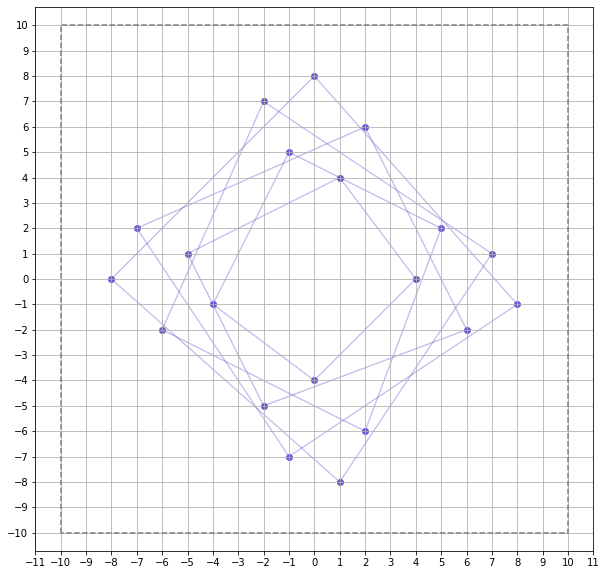

In [9]:
# ORBIT OF A SINGLE POINT UNDER POLY FOR d=odd

p = poly(d)     # get the polynomial

# Check the polynomial:
# print([p(x) for x in range(-d-1,d+3)])


box_range = [-int((d+5)/2),int((d+5)/2)]
check_range = [-int((d+5)/2),int((d+5)/2)]     # could start cycles in a subset of the box 

plt.figure(figsize = (fig_size,fig_size))

xs = [box_range[0],box_range[0],box_range[1],box_range[1],box_range[0]]     
ys = [box_range[0],box_range[1],box_range[1],box_range[0],box_range[0]]
plt.plot(xs,ys,"--",color = "grey")     # draw a box through the box corresponding to the range, to show where the cycles are relative to it

if d%6 == 1:
    R = int((d+1)/2)
elif d%6 == 3:
    R = int((d+1)/2)-2
elif d%6 == 5:
    R =int((d+1)/2)-3

xs = [-R,R,R,-R,-R]     
ys = [-R,-R,R,R,-R]
plt.plot(xs,ys,"--",color = "navy")     # draw a box through the box corresponding to the range, to show where the cycles are relative to it

pt_to_trace =[-6,-2]

plot_orbit(trace_pt_any_orbit(p,pt_to_trace),1,box_range)

# plot formatting:

plt.grid(which="both")
plt.xticks([i for i in range(box_range[0]-1,box_range[1]+2)])
plt.yticks([i for i in range(box_range[0]-1,box_range[1]+2)])
plt.axis('equal')
plt.show()
plt.close()